# EXPLORATORY DATA ANALYSIS OF BRITISH AIRWAYS CUSTOMER REVIEWS

-> The following project was assigned in a forage internship program

## Data Collection and webscrapping

Britsih Airways airline data is present on  [Skytrax](https://www.airlinequality.com/airline-reviews/british-airways). We will collect data about airline ratings, seat ratings and lounge experience ratings from this website. 


In [2]:
#importing libraries

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests 

In [3]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [4]:
from bs4 import BeautifulSoup
import requests

reviews = []
stars = []
dates = []
countries = []

for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html.parser")
    
    review_items = soup.find_all("div", class_="text_content")
    star_items = soup.find_all("div", class_="rating-10")
    date_items = soup.find_all("time")
    country_items = soup.find_all("h3")
    
    # Ensure that the lengths of the items are consistent
    num_reviews = len(review_items)
    num_stars = len(star_items)
    num_dates = len(date_items)
    num_countries = len(country_items)
    
    max_length = max(num_reviews, num_stars, num_dates, num_countries)
    
    for index in range(max_length):
        # Reviews
        if index < num_reviews:
            reviews.append(review_items[index].text.strip())
        else:
            reviews.append("None")
        
        # Stars
        if index < num_stars:
            try:
                stars.append(star_items[index].span.text.strip())
            except:
                print(f"Error on page {i} for star index {index}")
                stars.append("None")
        else:
            stars.append("None")
        
        # Dates
        if index < num_dates:
            dates.append(date_items[index].text.strip())
        else:
            dates.append("None")
        
        # Countries
        if index < num_countries:
            try:
                countries.append(country_items[index].span.next_sibling.text.strip(" ()"))
            except:
                print(f"Error on page {i} for country index {index}")
                countries.append("None")
        else:
            countries.append("None")

# Output the lengths to ensure they are equal
print("Reviews:", len(reviews))
print("Stars:", len(stars))
print("Dates:", len(dates))
print("Countries:", len(countries))


Error on page 33 for star index 50
Error on page 34 for star index 79
Error on page 35 for star index 1
Reviews: 3535
Stars: 3535
Dates: 3535
Countries: 3535


In [5]:
#create  a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":dates, "country": countries})

In [6]:
df.head()

,reviews,stars,date,country
0,Not Verified | Singapore to Heathrow. Busine...,5,16th July 2024,New Zealand
1,Not Verified | I reported my damaged/ruined ...,1,15th July 2024,United Kingdom
2,"Not Verified | On March 1st, I flew from Ber...",1,9th July 2024,Germany
3,Not Verified | The WORST customer experience! ...,1,5th July 2024,United Kingdom
4,Not Verified | Had to cancel my flight month...,1,1st July 2024,Canada


In [7]:
df.shape

(3535, 4)

### Export the data into a csv format

In [8]:
import os
cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

## Data Cleaning and Preprocessing

In [9]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [10]:
df=pd.read_csv("BA_reviews.csv") # read the extracted data

In [11]:
df.head()

,Unnamed: 0,reviews,stars,date,country
0,0,Not Verified | Singapore to Heathrow. Busine...,5.0,16th July 2024,New Zealand
1,1,Not Verified | I reported my damaged/ruined ...,1.0,15th July 2024,United Kingdom
2,2,"Not Verified | On March 1st, I flew from Ber...",1.0,9th July 2024,Germany
3,3,Not Verified | The WORST customer experience! ...,1.0,5th July 2024,United Kingdom
4,4,Not Verified | Had to cancel my flight month...,1.0,1st July 2024,Canada


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3535 non-null   int64  
 1   reviews     3500 non-null   object 
 2   stars       3532 non-null   float64
 3   date        3500 non-null   object 
 4   country     3498 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 138.2+ KB


In [13]:
df.columns

Index(['Unnamed: 0', 'reviews', 'stars', 'date', 'country'], dtype='object')

In [14]:
# remove verified from the reviews
df['verified'] = df.reviews.str.contains("Trip Verified")
df.verified

0       False
1       False
2       False
3       False
4       False
        ...  
3530    False
3531    False
3532    False
3533    False
3534      NaN
Name: verified, Length: 3535, dtype: object

In [15]:
df

,Unnamed: 0,reviews,stars,date,country,verified
0,0,Not Verified | Singapore to Heathrow. Busine...,5.0,16th July 2024,New Zealand,False
1,1,Not Verified | I reported my damaged/ruined ...,1.0,15th July 2024,United Kingdom,False
2,2,"Not Verified | On March 1st, I flew from Ber...",1.0,9th July 2024,Germany,False
3,3,Not Verified | The WORST customer experience! ...,1.0,5th July 2024,United Kingdom,False
4,4,Not Verified | Had to cancel my flight month...,1.0,1st July 2024,Canada,False
...,...,...,...,...,...,...
3530,3530,Took 6 BA flights as part of a OneWorld RTW tr...,1.0,12th October 2014,Australia,False
3531,3531,Flown 6 flights on BA recently generally satis...,9.0,12th October 2014,United Kingdom,False
3532,3532,Without being completely detrimental to BA I H...,7.0,12th October 2014,Mexico,False
3533,3533,Travelled to Cyprus from Gatwick in economy as...,1.0,12th October 2014,United Kingdom,False


In [16]:
df

,Unnamed: 0,reviews,stars,date,country,verified
0,0,Not Verified | Singapore to Heathrow. Busine...,5.0,16th July 2024,New Zealand,False
1,1,Not Verified | I reported my damaged/ruined ...,1.0,15th July 2024,United Kingdom,False
2,2,"Not Verified | On March 1st, I flew from Ber...",1.0,9th July 2024,Germany,False
3,3,Not Verified | The WORST customer experience! ...,1.0,5th July 2024,United Kingdom,False
4,4,Not Verified | Had to cancel my flight month...,1.0,1st July 2024,Canada,False
...,...,...,...,...,...,...
3530,3530,Took 6 BA flights as part of a OneWorld RTW tr...,1.0,12th October 2014,Australia,False
3531,3531,Flown 6 flights on BA recently generally satis...,9.0,12th October 2014,United Kingdom,False
3532,3532,Without being completely detrimental to BA I H...,7.0,12th October 2014,Mexico,False
3533,3533,Travelled to Cyprus from Gatwick in economy as...,1.0,12th October 2014,United Kingdom,False


In [17]:
# cleaning stars
# checking unique star values
df.stars.unique()

array([ 5.,  1.,  6.,  3.,  9.,  2.,  8.,  7.,  4., 10., nan])

In [18]:
df.stars.value_counts()

stars
1.0     864
2.0     410
3.0     405
8.0     343
10.0    287
9.0     282
7.0     276
5.0     250
4.0     240
6.0     175
Name: count, dtype: int64

In [19]:
df.isnull().sum()

Unnamed: 0     0
reviews       35
stars          3
date          35
country       37
verified      35
dtype: int64

In [20]:
df.columns


Index(['Unnamed: 0', 'reviews', 'stars', 'date', 'country', 'verified'], dtype='object')

# dropping insufficient data


In [21]:
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)
df.drop(df[df.stars.isnull() == True].index, axis=0, inplace=True)

In [22]:
df = df.drop('Unnamed: 0', axis=1) 

In [23]:
df.isnull().sum()

reviews     0
stars       0
date        0
country     0
verified    0
dtype: int64

In [24]:
#cleaned dataset
df.head()

,reviews,stars,date,country,verified
0,Not Verified | Singapore to Heathrow. Busine...,5.0,16th July 2024,New Zealand,False
1,Not Verified | I reported my damaged/ruined ...,1.0,15th July 2024,United Kingdom,False
2,"Not Verified | On March 1st, I flew from Ber...",1.0,9th July 2024,Germany,False
3,Not Verified | The WORST customer experience! ...,1.0,5th July 2024,United Kingdom,False
4,Not Verified | Had to cancel my flight month...,1.0,1st July 2024,Canada,False


### The above given is a cleaned dataset of the company British Airways which contains the customer rating and feedback

## EXPLORATORY DATA ANALYSIS

## 1. Waht are the available ratings


In [25]:
df.stars.unique()

array([ 5.,  1.,  6.,  3.,  9.,  2.,  8.,  7.,  4., 10.])

## 2. . What is the average overall rating given for British Airways?

In [26]:
df.stars.mean()

4.597711015736767

## 3. What is the total counts for each ratings?

Text(0.5, 0.98, 'Counts for each ratings')

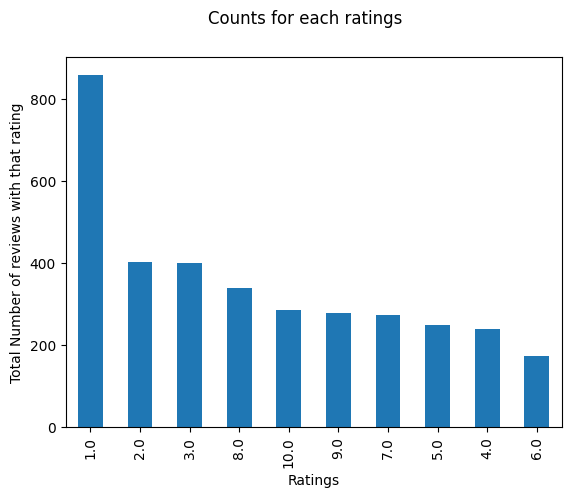

In [27]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

### The above graph suggests that majority people has rated '1'

### 4. How many unique countries

In [28]:
print(f"{len(df.country.unique())} unique countries")

70 unique countries


### 5. which country has the most review

In [29]:
most_reviewed_country = df['country'].value_counts().idxmax()
print("Country with the Most Reviews:", most_reviewed_country)

Country with the Most Reviews: United Kingdom


### Hence united kingdom has more number of reviews

## 6. Average rating over time

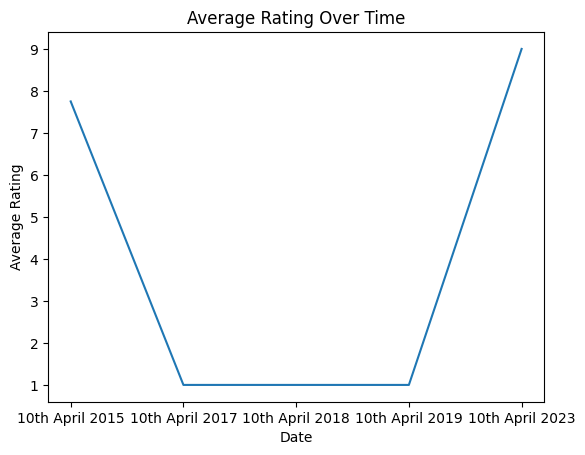

In [30]:
# 1. Average Rating Over Time
avg_rating_by_date = df.groupby('date')['stars'].mean()
plt.plot(avg_rating_by_date[:5])
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.title('Average Rating Over Time')
plt.show()

### The rating has significantly increased over the years

## 7. Top N Countries with the Most Reviews


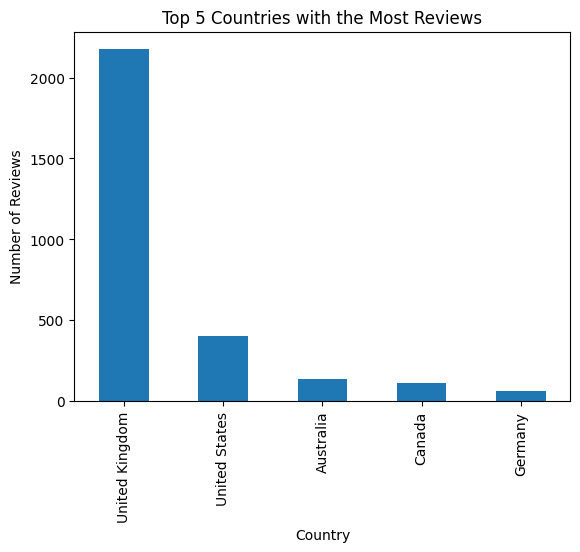

In [31]:
top_countries = df['country'].value_counts().head(5)
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.title('Top 5 Countries with the Most Reviews')
plt.show()

### Therefore UNited Kingdom has the most reviews

## 8 Average Rating by Country

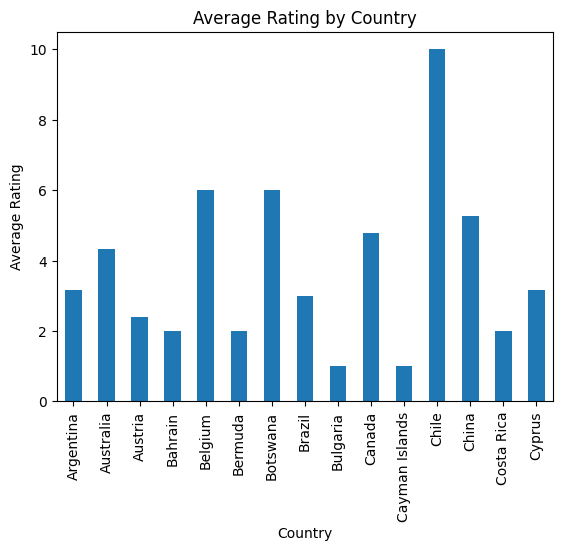

In [32]:
avg_rating_by_country = df.groupby('country')['stars'].mean()[:15]
avg_rating_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.title('Average Rating by Country')
plt.show()


### the country chile has the most average rating in the top 15 records

## 9. Number of Reviews Over Time

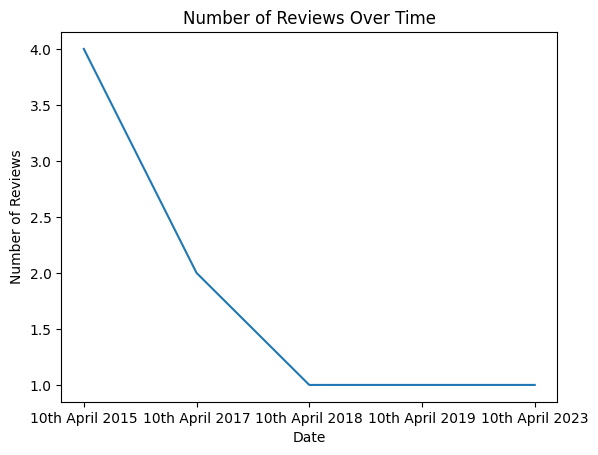

In [33]:
review_count_by_date = df.groupby('date').size()[:5]
plt.plot(review_count_by_date)
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time')
plt.show()

### The number of reviews has decreased over time

## 10. How many verified trips

In [34]:
num_verified_trips = df['verified'].value_counts()
print("Number of verified trips:", num_verified_trips)

Number of verified trips: verified
False    2251
True     1244
Name: count, dtype: int64


## 11. Countries with most verified trips


In [35]:
most_verified_country = df[df['verified'] == True]['country'].value_counts()[:15]
print("Country with most verified trips:", most_verified_country)

Country with most verified trips: country
United Kingdom          705
United States           184
Australia                42
Canada                   40
Germany                  33
South Africa             17
Switzerland              13
Netherlands              13
France                   12
India                    11
Spain                    11
United Arab Emirates     10
Malaysia                 10
Singapore                10
Sweden                   10
Name: count, dtype: int64


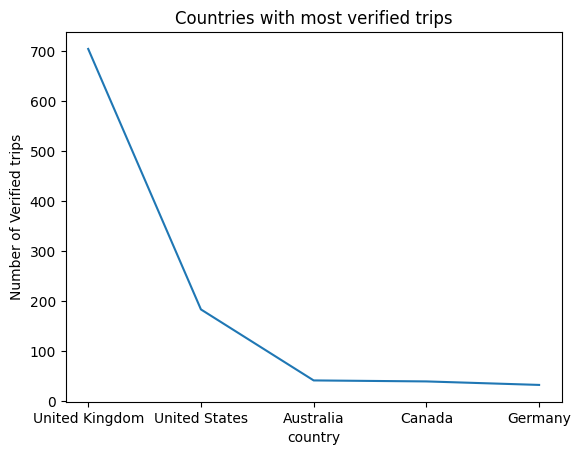

In [37]:
most_verified_country = df[df['verified'] == True]['country'].value_counts()[:5]
plt.plot(most_verified_country)
plt.xlabel('country')
plt.ylabel('Number of Verified trips')
plt.title('Countries with most verified trips')
plt.show()

## Hence the most verified country is united kingdom

## 12. Countries with most unverified trips

In [38]:
most_unverified_country = df[df['verified'] == False]['country'].value_counts().idxmax()
print("Country with most unverified trips:", most_unverified_country)

Country with most unverified trips: United Kingdom


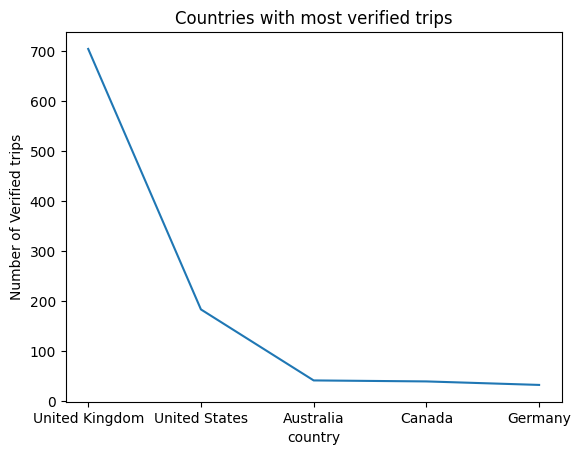

In [39]:
most_unverified_country = df[df['verified'] == False]['country'].value_counts().idxmax()[:5]
plt.plot(most_verified_country)
plt.xlabel('country')
plt.ylabel('Number of Verified trips')
plt.title('Countries with most verified trips')
plt.show()

### Hence the country with most unverified trips is also united kingdom

## 14. Top N Reviewers with the Most Reviews

In [152]:
top_reviewers = df['country'].value_counts().head(5)
print("Top N Reviewers with the Most Reviews:")
print(top_reviewers)

Top N Reviewers with the Most Reviews:
country
United Kingdom    2173
United States      407
Australia          143
Canada             108
Germany             64
Name: count, dtype: int64


## 15 Group by verified trips

In [155]:
df.columns

Index(['reviews', 'stars', 'date', 'country', 'verified'], dtype='object')

In [160]:
 df.groupby('country')['reviews'].head(5)


0       ✅ Trip Verified |  I booked a long haul flight...
1       ✅ Trip Verified |  A premium price for a sub-p...
2       ✅ Trip Verified |  Really terrible user experi...
3       ✅ Trip Verified | Very impressed with BA. Chec...
4       ✅ Trip Verified |  LHR - SFO, LAS - LGW August...
                              ...                        
3088    JNB-LHR BA056 May 13 2015. LHR-JNB BA055 May 2...
3153    15th Aug 2014 flight BA0272. Me and my 3 frien...
3162    17 April 2015 Airbus A320 Business Heathrow to...
3480    I fly the POS to LGW route on a fairly regular...
3486    OSL-LHR in Business. BA has over the last few ...
Name: reviews, Length: 253, dtype: object

## 16. Percentage of Positive trips

In [164]:
df[df.verified==True].count() * 100 /(len(reviews))

reviews     34.710042
stars       34.710042
date        34.710042
country     34.710042
verified    34.710042
dtype: float64

## 17 . Percentage of negative trips


In [165]:
df[df.verified==False].count() * 100 /(len(reviews))

reviews     64.158416
stars       64.158416
date        64.158416
country     64.158416
verified    64.158416
dtype: float64

## 18. verified trips with time

In [166]:
most_verified = df[df['verified'] == True]['date'].value_counts()[:15]
print("Country with most verified trips:", most_verified)

Country with most verified trips: date
8th December 2019     6
11th May 2018         6
30th November 2017    5
18th November 2019    4
4th September 2023    4
2nd June 2018         4
17th January 2018     4
8th January 2018      4
20th June 2018        4
25th June 2018        4
19th March 2018       4
3rd April 2018        4
5th February 2018     4
9th October 2019      4
1st December 2017     4
Name: count, dtype: int64


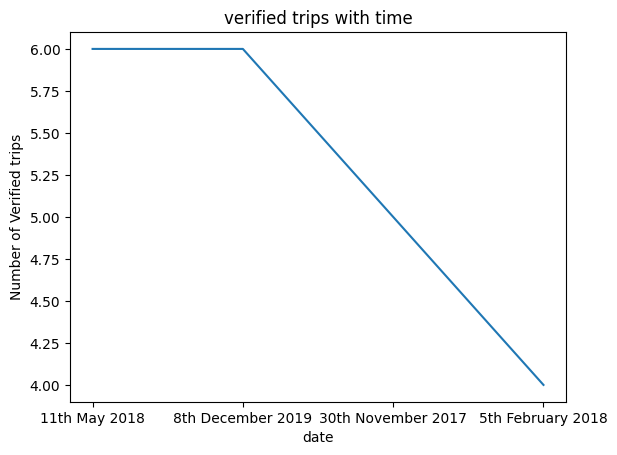

In [41]:
most_verified = df[df['verified'] == True]['date'].value_counts()[:4]
plt.plot(most_verified)
plt.xlabel('date')
plt.ylabel('Number of Verified trips')
plt.title('verified trips with time')
plt.show()

## Hence the number of verified trips with time has decreased

## 19. unverified trips with time

In [42]:
most_unverified = df[df['verified'] == False]['date'].value_counts()[:4]
print("Country with most unverified trips:", most_unverified)

Country with most unverified trips: date
19th January 2015     26
20th November 2014    17
28th October 2014     14
31st May 2015         12
Name: count, dtype: int64


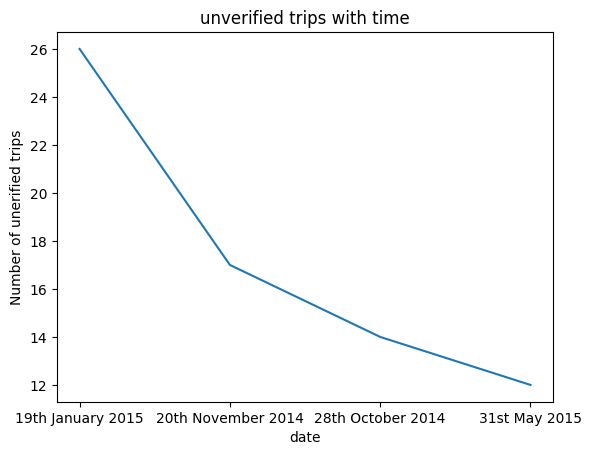

In [43]:
plt.plot(most_unverified)
plt.xlabel('date')
plt.ylabel('Number of unerified trips')
plt.title('unverified trips with time')
plt.show()

### Therefore the unverified trips has also decreased with time

## 20. Conclusion:

### -> As per the trends noticed, it can be observed that
### 1. United Kingdom has the highest number of customers in British Airways
### 2. Over time the negative reviews has been decreasing
### 3. Over time there is a significant raise in ratings as well.